In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models'

results_df = pd.read_csv(os.path.join(datadir, 'selected_features', 'all.stat.results.csv'))
results_allfeats_df = pd.read_csv(os.path.join(datadir, 'all_features', 'all.stat.results.csv'))

In [3]:
results_df.head()

,cv_mean_best,cv_std_best,cv_ind_sel,cv_mean_sel,cv_std_sel,C_best,gamma_best,C_sel,gamma_sel,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.915035,0.005912,24,0.912131,0.004841,10.0,0.10,1.0,0.1,0.932,0.147,0.915,0.164,0.884,0.198,YHB,P
1,0.821419,0.018538,24,0.821419,0.018538,1.0,0.10,1.0,0.1,0.859,0.211,0.834,0.220,0.044,0.577,YDC,P
2,0.903960,0.006974,24,0.903960,0.006974,1.0,0.10,1.0,0.1,0.925,0.157,0.914,0.164,0.816,0.239,YWB,P
3,0.904138,0.005449,24,0.904138,0.005449,1.0,0.10,1.0,0.1,0.924,0.153,0.912,0.166,0.835,0.235,MCID,P
4,0.900035,0.013180,24,0.896342,0.011197,100.0,0.01,1.0,0.1,0.922,0.157,0.901,0.171,0.816,0.250,YHL,P


# Look at the scores from various splits

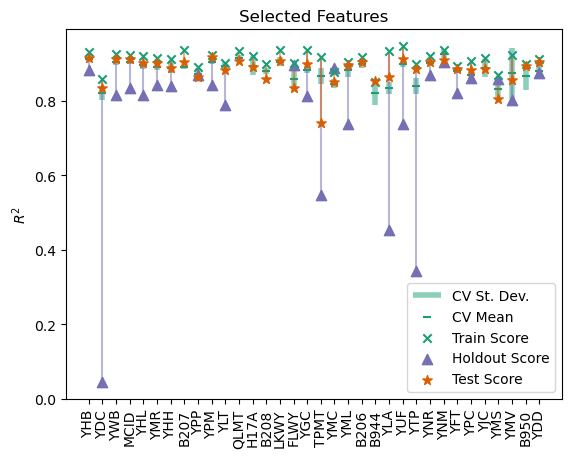

In [4]:
plotting.plot_station_splits_scores_scatter(results_df, title='Selected Features', vlines=True)

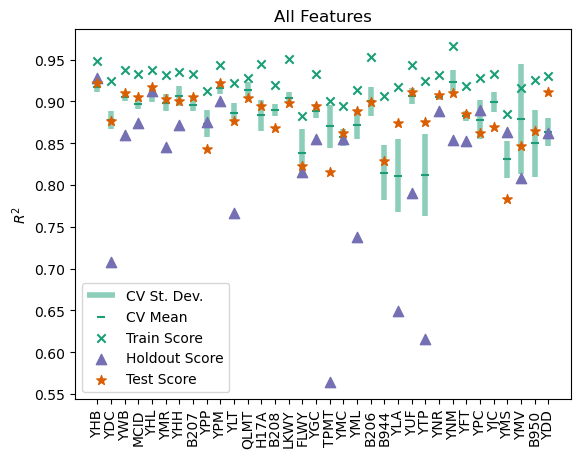

In [5]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, title='All Features')

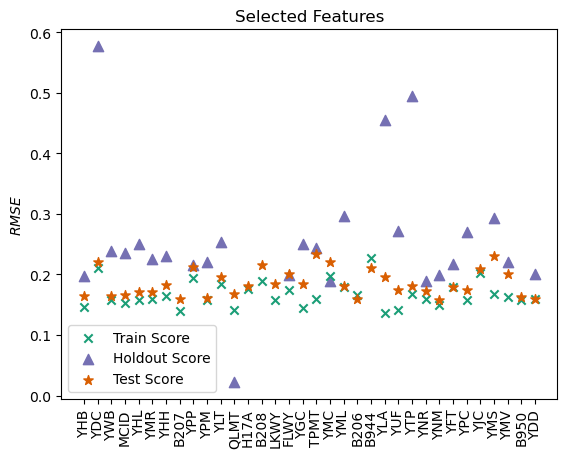

In [6]:
plotting.plot_station_splits_scores_scatter(results_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='Selected Features')

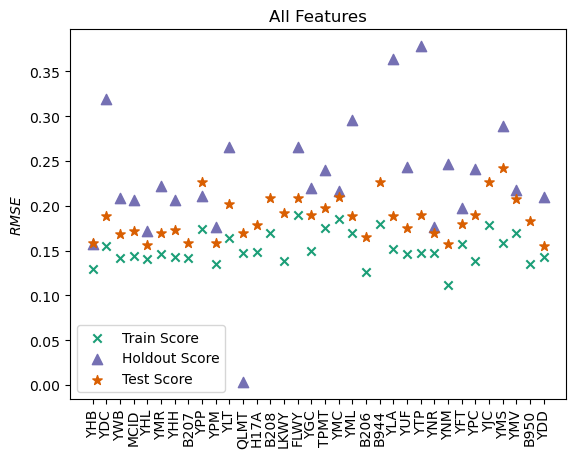

In [7]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='All Features')

# Compare the scores of a single split using different features

Index(['station', 'train_r2_x', 'train_r2_y'], dtype='object')


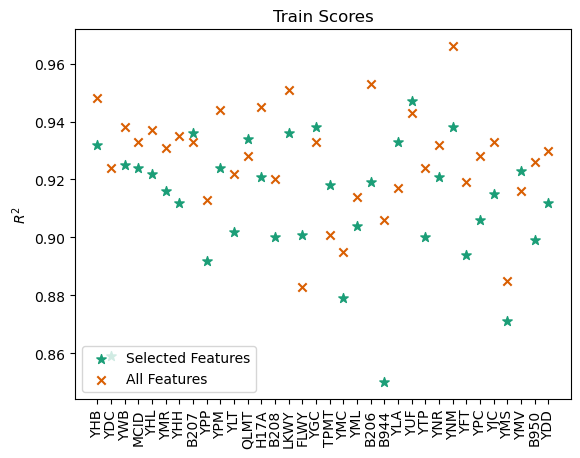

In [8]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='train_r2',
                               title='Train Scores'
                               )

Index(['station', 'test_r2_x', 'test_r2_y'], dtype='object')


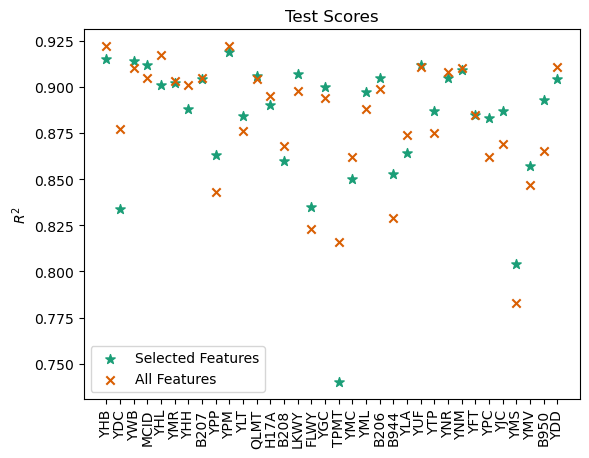

In [9]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               title='Test Scores'
                               )

Index(['station', 'holdout_r2_x', 'holdout_r2_y'], dtype='object')


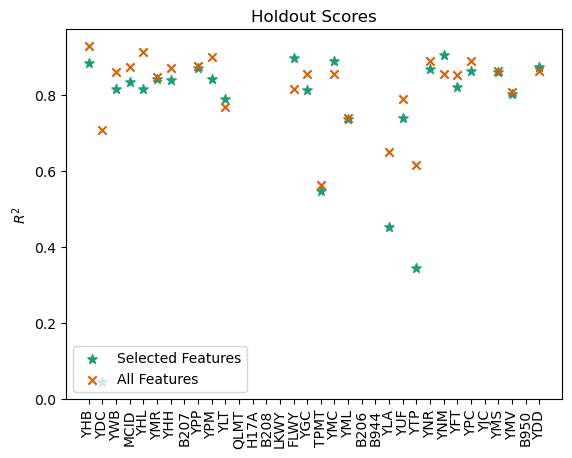

In [10]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='holdout_r2',
                               title='Holdout Scores'
                               )

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

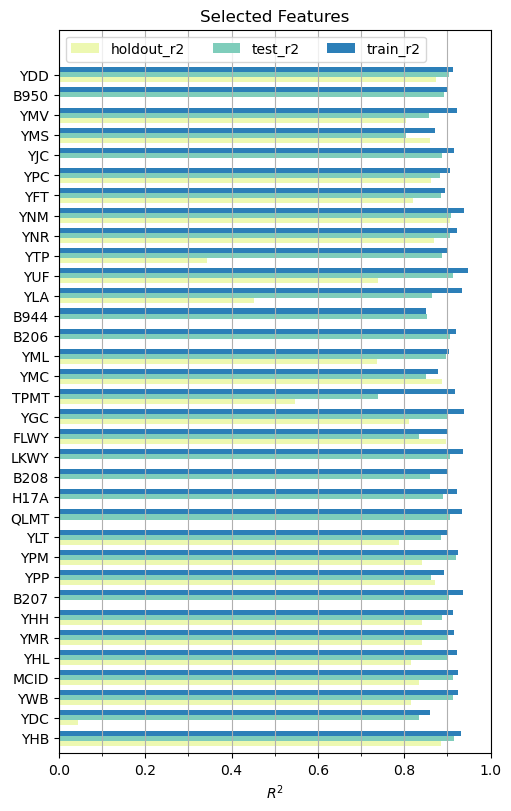

In [12]:
# Based off of 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
width = 0.25  # the width of the bars
multiplier = 0

#colors = ['#1b9e77', '#d95f02', '#7570b3']
#colors = ['#66c2a5', '#fc8d62', '#8da0cb']
#colors = ['#a6cee3', '#1f78b4', '#b2df8a']
colors = ['#edf8b1', '#7fcdbb', '#2c7fb8']

df = results_df

fig, ax = plt.subplots(layout='constrained', figsize=(5, 8))
y =np.arange(results_df['station'].shape[0])

for i, col in enumerate(['holdout_r2', 'test_r2', 'train_r2']):
    offset = width * multiplier
    rects = ax.barh(y + offset, results_df[col], width, label=col, color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(f'$R^2$')
ax.set_title('Selected Features')
ax.set_yticks(y + width, results_df['station'])
ax.set_yticklabels(results_df['station'])
ax.legend(loc='upper left', ncols=3)
ax.set_xlim([0, 1.0])
ax.set_ylim([-0.5, np.max(y)+2.5])
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(which='both', axis='x', zorder=0)
plt.show()

In [13]:
# plotting.scores_heatmap(results_df.sort_values('station'),
#                         midpoint_normalize=True,
#                         midpoint=0.8,
#                         cmap_min=0,
#                         title='Selected Features',
#                         cbar_label=f'$R^2$'
#                         )

# plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
#                         midpoint_normalize=True,
#                         midpoint=0.8,
#                         cmap_min=0,
#                         title='All Features',
#                         cbar_label=f'$R^2$'
#                         )

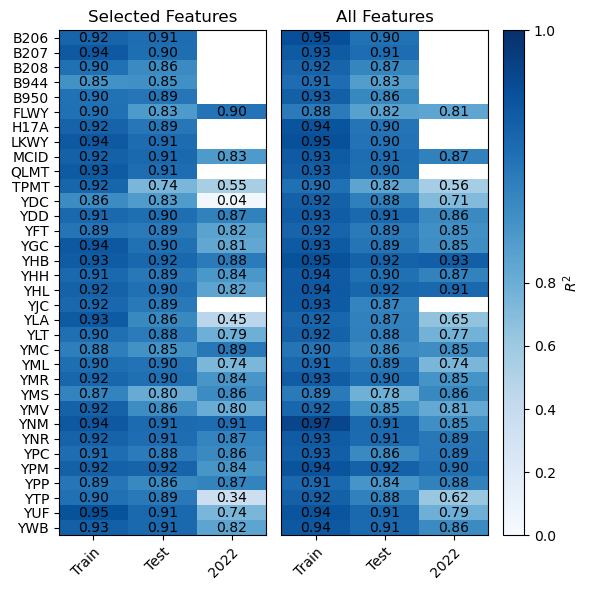

In [18]:
fig, axes = plt.subplots(1, 3, width_ratios=[2, 2, 0.2], figsize=(6, 6))

midpoint_normalize = True
midpoint = 0.8
cmap_min = 0
cmap_max = 1.0
xlabels=['Train', 'Test', '2022']

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Selected Features',
                        ax=axes[0],
                        show_ylabels=True,
                        show_cbar=False,
                        xticklabels=xlabels)
im2 = plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='All Features',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=False,
                        xticklabels=xlabels
                        )
plt.colorbar(im2, cax=axes[2], label=f'$R^2$')
fig.tight_layout()
fig.show()

In [15]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']

cmap min set to -0.6639999999999999


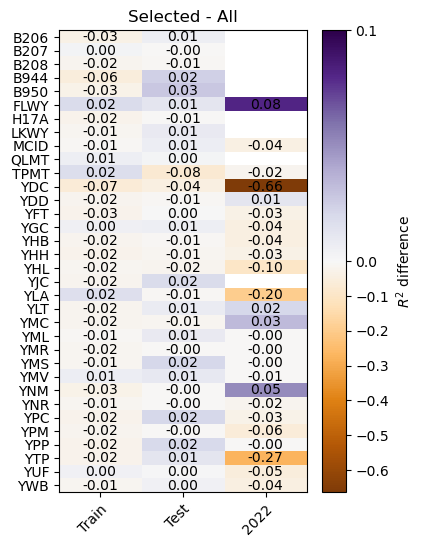

In [20]:
im = plotting.scores_heatmap(diff_df,
                        midpoint_normalize=True,
                        midpoint=0,
                        cmap_max = 0.1,
                        cmap_min = None,
                        title='Selected - All',
                        show_ylabels=True,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'$R^2$ difference',
                        cmap=cm.PuOr,)
